# Задание 1

## Подгрузка датафрейма и очистка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/zalig/cu-datasets/main/advertisment.csv")
data

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,NaN,NaN,NaN
1,2001,23,Female,2024,NaN,NaN,NaN
2,2002,22,Male,2024,NaN,NaN,NaN
3,2004,20,Male,2023,NaN,1.0,1.0
4,2003,21,Female,2024,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,NaN,NaN,NaN
19996,2001,23,Male,2024,NaN,NaN,NaN
19997,1998,26,Male,2024,NaN,NaN,NaN
19998,2003,21,Male,2023,NaN,NaN,NaN


In [3]:
data['A'] = data['A'].apply(lambda x: 0 if x!= 1 else 1)
data['B'] = data['B'].apply(lambda x: 0 if x!= 1 else 1)
data['Purchased'] = data['Purchased'].apply(lambda x: 0 if x!= 1 else 1)
data

,BirthdayYear,Age,Gender,ClientSince,A,B,Purchased
0,2003,21,Male,2023,0,0,0
1,2001,23,Female,2024,0,0,0
2,2002,22,Male,2024,0,0,0
3,2004,20,Male,2023,0,1,1
4,2003,21,Female,2024,0,0,0
...,...,...,...,...,...,...,...
19995,2001,23,Male,2024,0,0,0
19996,2001,23,Male,2024,0,0,0
19997,1998,26,Male,2024,0,0,0
19998,2003,21,Male,2023,0,0,0


## Количество клиентов

In [4]:
client_count = len(data)
print(f'Количество клиентов: {client_count}')

Количество клиентов: 20000


## Количество клиентов в контрольных группах

In [5]:
# Подсчет количества клиентов в контрольных группах A и B
group_counts_A = data[data['A'] == 1]['A'].shape[0]
group_counts_B = data[data['B'] == 1]['B'].shape[0]
group_counts_n = data[(data['A'] == 0) & (data['B'] == 0)].shape[0]

# Вывод результатов
print(f'Количество клиентов в группе A: {group_counts_A}')  # Группа A
print(f'Количество клиентов в группе B: {group_counts_B}')  # Группа B
print(f'Количество клиентов в контрольной группе: {group_counts_n}')  # Контрольная группа

Количество клиентов в группе A: 300
Количество клиентов в группе B: 500
Количество клиентов в контрольной группе: 19200


## Количество покупателей среди всех групп

In [6]:
num_purchased_all = data[data['Purchased'] == 1]['Purchased'].shape[0]
print("Количество покупателей (среди всех):", num_purchased_all)

Количество покупателей (среди всех): 1327


## Количество покупателей в группах A, B, и кол-во покупателей, не видевших рекламу

In [7]:
num_purchased_a = data[(data['A'] == 1) & (data['Purchased'] == 1)].shape[0]
num_purchased_a

33

In [8]:
num_purchased_b = data[(data['B'] == 1) & (data['Purchased'] == 1)].shape[0]
num_purchased_b

66

In [9]:
num_purchased_n = data[(data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1)].shape[0]
num_purchased_n

1228

## Расчёты конверсий

Конверсия группы A (в %)

In [10]:
a_conversion = 33/300*100
a_conversion

11.0

Конверсия группы B (в %)

In [11]:
b_conversion = 66/500*100
b_conversion

13.200000000000001

Конверсия покупателей, не видевших рекламу

In [12]:
n_conversion = 1228 / (20_000 - 300 - 500) * 100
n_conversion

6.395833333333334

Общая конверсия

In [13]:
all_conversation = 1337 / 20_000 * 100
all_conversation

6.6850000000000005

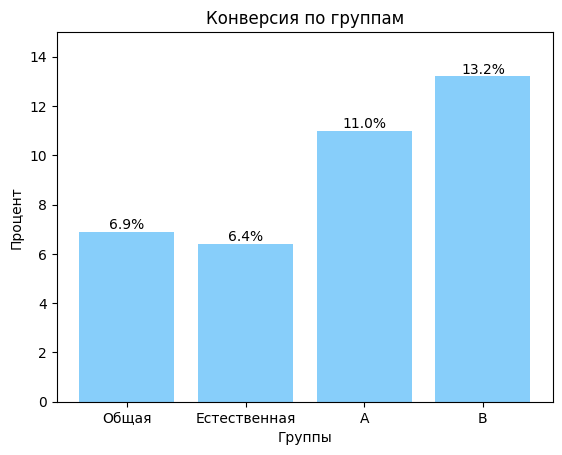

In [14]:
labels = ['Общая', 'Естественная', 'A', 'B']
conversion = [6.9, 6.4, 11, 13.2]
plt.bar(labels, conversion, color=['lightskyblue'])

plt.title('Конверсия по группам')
plt.xlabel('Группы')
plt.ylabel('Процент')
plt.ylim(0, 15)


for i, v in enumerate(conversion):
  plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Задание 2

## Кол-во новых покупок при показе рекламы А тем, кто ещё не видел никакую

In [15]:
delta_conversation_a_n = a_conversion - n_conversion
delta_conversation_a_n

4.604166666666666

In [16]:
new_clients_a_n = ((20_000 - 300 - 500) * delta_conversation_a_n) / 100
print("Дополнительные покупки при рекламе A:", new_clients_a_n)

Дополнительные покупки при рекламе A: 883.9999999999999


## Кол-во новых покупок при показе рекламы B тем, кто ещё не видел никакую

In [17]:
delta_conversation_b_n = b_conversion - n_conversion
delta_conversation_b_n

6.804166666666667

In [18]:
new_clients_b_n = ((20_000 - 300 - 500) * delta_conversation_b_n) / 100
print("Дополнительные покупки при рекламе B:", new_clients_b_n)

Дополнительные покупки при рекламе B: 1306.4


График

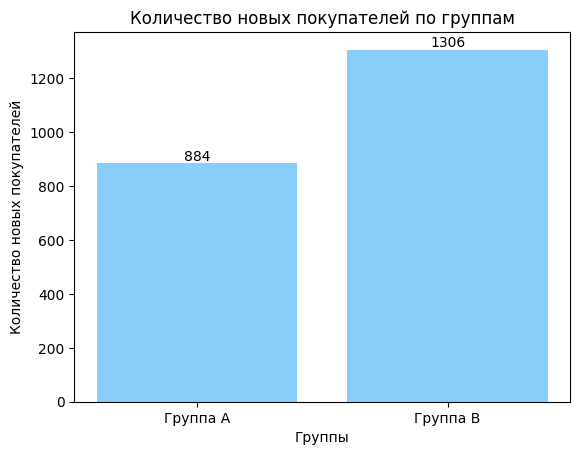

In [19]:
labels = ['Группа A', 'Группа B']
new_buyers = [884, 1306]

plt.bar(labels, new_buyers, color=['lightskyblue'])

plt.title('Количество новых покупателей по группам')
plt.xlabel('Группы')
plt.ylabel('Количество новых покупателей')

for i, v in enumerate(new_buyers):
  plt.text(i, v, str(v), ha='center', va='bottom')

# Задание 3 (Red)

## Вводные

*   Количество новых покупок для сценария А: 884
*   Количество новых покупок для сценария В: 1306
*   Доход с 1 покупателя: 3000р
*   Расход на рекламу для 1 клиента: 80р






## Доход, расходы и прибыль для сценария A

In [20]:
new_income_a = 884 * 3000
new_income_a

2652000

In [21]:
new_expenses_a = 19_200 * 80
new_expenses_a

1536000

In [22]:
new_profit_a = new_income_a - new_expenses_a
new_profit_a

1116000

## Доход, расходы и прибыль для сценария B

In [23]:
new_income_b = 1306 * 3000
new_income_b

3918000

In [24]:
new_expenses_b = 19_200 * 80
new_expenses_b

1536000

In [25]:
new_profit_b = new_income_b - new_expenses_b
new_profit_b

2382000

##Графики

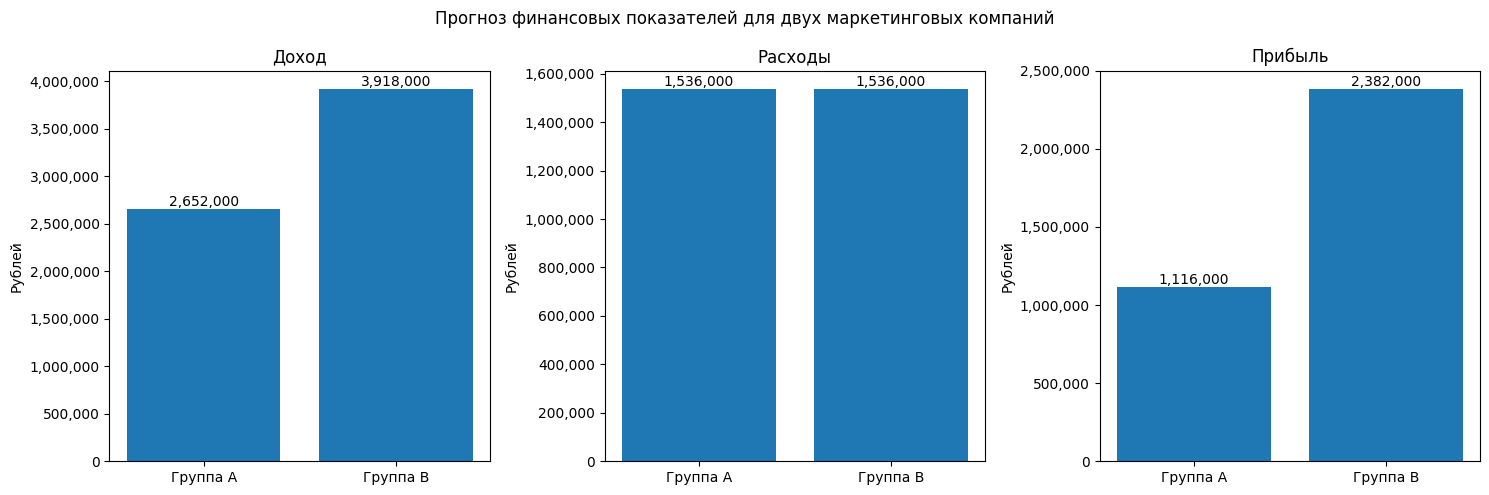

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Расчет доходов, расходов и прибыли
new_income_a = 884 * 3000
new_income_b = 1306 * 3000
new_expenses_a = 19_200 * 80
new_expenses_b = 19_200 * 80
new_profit_a = new_income_a - new_expenses_a
new_profit_b = new_income_b - new_expenses_b

groups = ['Группа A', 'Группа B']

df = {
    'Доход': [new_income_a, new_income_b],
    'Расходы': [new_expenses_a, new_expenses_b],
    'Прибыль': [new_profit_a, new_profit_b]
}

# Создание графиков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Прогноз финансовых показателей для двух маркетинговых компаний')

# Функция для форматирования чисел на оси Y
def format_func(value, tick_number):
    return f"{int(value):,}"  # Форматирование с разделением тысяч

for i, (metric, values) in enumerate(df.items()):
    axes[i].bar(groups, values)
    axes[i].set_title(metric)
    axes[i].set_ylabel('Рублей')

    # Применение форматирования к оси Y
    axes[i].yaxis.set_major_formatter(FuncFormatter(format_func))

    # Добавление значений над столбцами
    for j, v in enumerate(values):
        axes[i].text(j, v, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Задание 4 (Red)

## Распределение пола среди всех клиентов

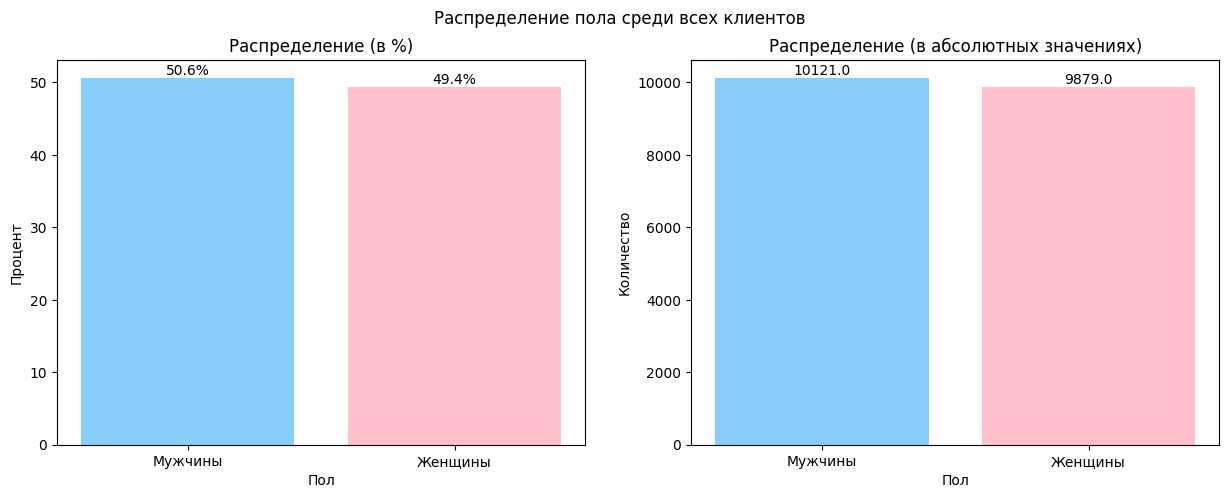

In [27]:
import matplotlib.pyplot as plt

all_male = 10121
all_female = 9879
all_total = 20_000

# Процентное соотношение
male_percent = (all_male / all_total) * 100
female_percent = (all_female / all_total) * 100
labels = ['Мужчины', 'Женщины']
percent_values = [male_percent, female_percent]
count_values = [all_male, all_female]

# Создаем подграфики
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение пола среди всех клиентов')

# Первый график: процентное соотношение
axs[0].bar(labels, percent_values, color=['lightskyblue', 'pink'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Пол')
axs[0].set_ylabel('Процент')
for i, v in enumerate(percent_values):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график: соотношение в количестве
axs[1].bar(labels, count_values, color=['lightskyblue', 'pink'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Пол')
axs[1].set_ylabel('Количество')
for i, v in enumerate(count_values):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

# # Показываем графики
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Чтобы заголовок не перекрывался с графиками
# plt.show()

## Распределение пола среди группы A

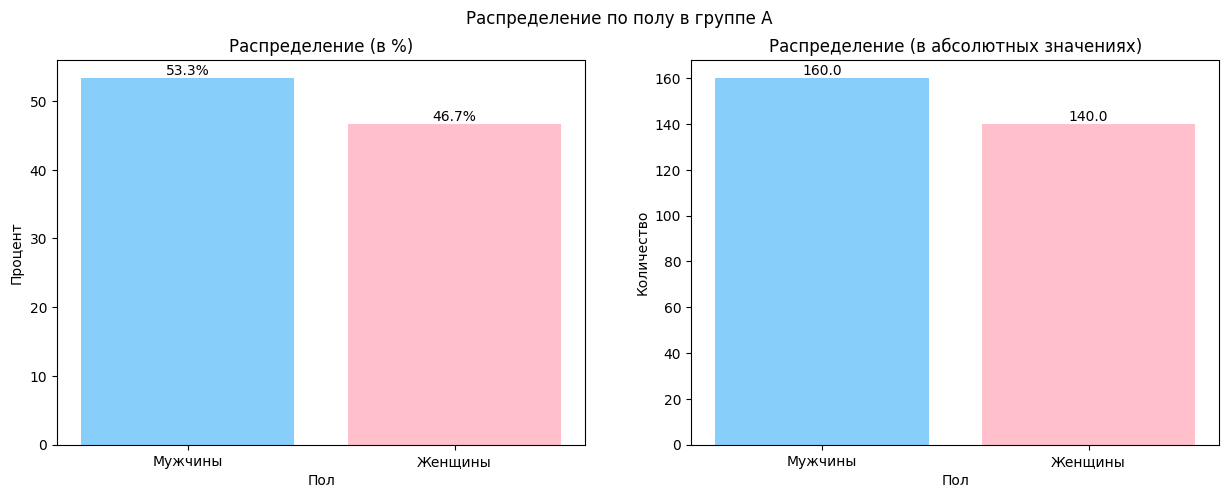

In [28]:
import matplotlib.pyplot as plt

count_male_a = data[(data['A'] == 1) & (data['Gender'] == 'Male')].shape[0]
count_male_a

count_female_a = data[(data['A'] == 1) & (data['Gender'] == 'Female')].shape[0]
count_female_a

# Данные
a_male = count_male_a
a_female = count_female_a
a_total = a_male + a_female

# Процентное соотношение
male_percent = (a_male / a_total) * 100
female_percent = (a_female / a_total) * 100
labels = ['Мужчины', 'Женщины']

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение по полу в группе А')

# Первый график - процентное соотношение
axs[0].bar(labels, [male_percent, female_percent], color=['lightskyblue', 'pink'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Пол')
axs[0].set_ylabel('Процент')
for i, v in enumerate([male_percent, female_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [a_male, a_female], color=['lightskyblue', 'pink'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Пол')
axs[1].set_ylabel('Количество')
for i, v in enumerate([a_male, a_female]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

# # Показать графики
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Убедитесь, что заголовок не перекрывает графики
# plt.show()


## Распределение пола среди группы B

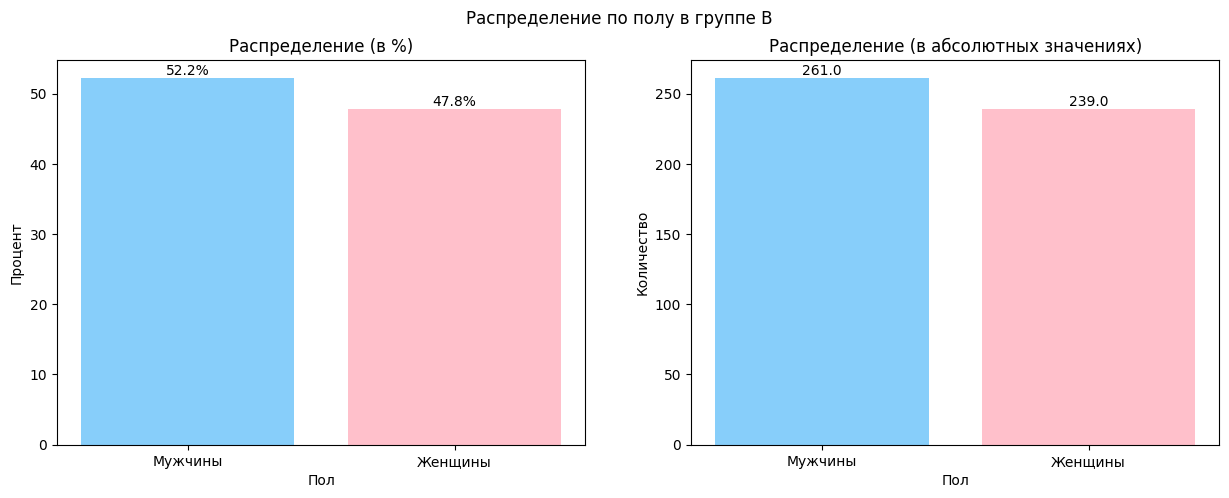

In [29]:
count_male_b = data[(data['B'] == 1) & (data['Gender'] == 'Male')].shape[0]
count_male_b

count_female_b = data[(data['B'] == 1) & (data['Gender'] == 'Female')].shape[0]
count_female_b

# Данные
b_male = count_male_b
b_female = count_female_b
b_total = b_male + b_female

# Процентное соотношение
male_percent = (b_male / b_total) * 100
female_percent = (b_female / b_total) * 100
labels = ['Мужчины', 'Женщины']

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение по полу в группе B')

# Первый график - процентное соотношение
axs[0].bar(labels, [male_percent, female_percent], color=['lightskyblue', 'pink'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Пол')
axs[0].set_ylabel('Процент')
for i, v in enumerate([male_percent, female_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [b_male, b_female], color=['lightskyblue', 'pink'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Пол')
axs[1].set_ylabel('Количество')
for i, v in enumerate([b_male, b_female]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

## Распределение пола среди контрольной группы

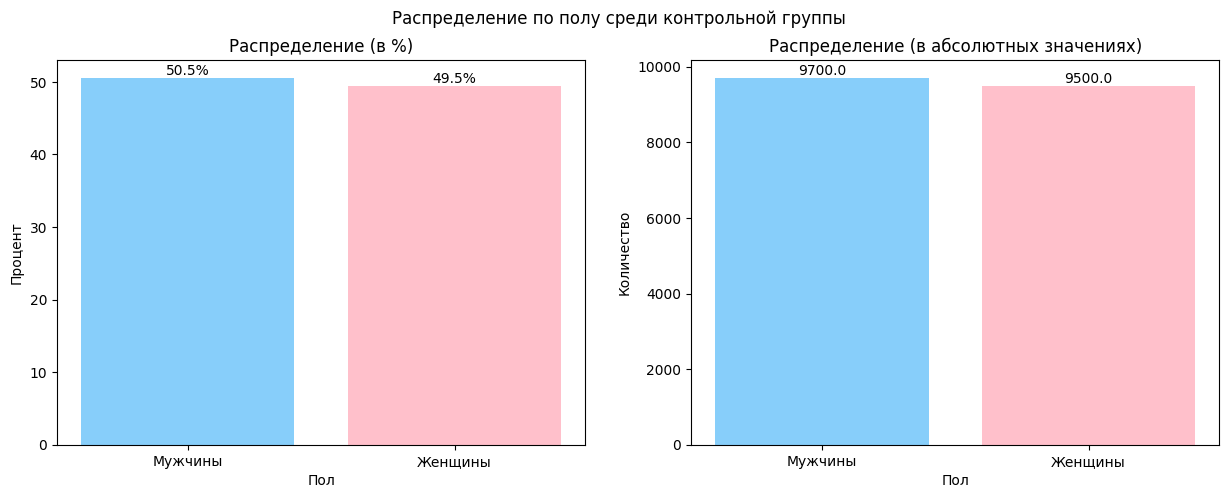

In [30]:
count_male_n = data[(data['A'] == 0) & (data['B'] == 0) & (data['Gender'] == 'Male')].shape[0]
count_male_n

count_female_n = data[(data['A'] == 0) & (data['B'] == 0) & (data['Gender'] == 'Female')].shape[0]
count_female_n

# Данные
n_male = count_male_n
n_female = count_female_n
n_total = n_male + n_female

# Процентное соотношение
male_percent = (n_male / n_total) * 100
female_percent = (n_female / n_total) * 100
labels = ['Мужчины', 'Женщины']

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение по полу среди контрольной группы')

# Первый график - процентное соотношение
axs[0].bar(labels, [male_percent, female_percent], color=['lightskyblue', 'pink'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Пол')
axs[0].set_ylabel('Процент')
for i, v in enumerate([male_percent, female_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [n_male, n_female], color=['lightskyblue', 'pink'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Пол')
axs[1].set_ylabel('Количество')
for i, v in enumerate([n_male, n_female]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

# Задание 5 (Red)

## Распределение возраста среди всех клиентов

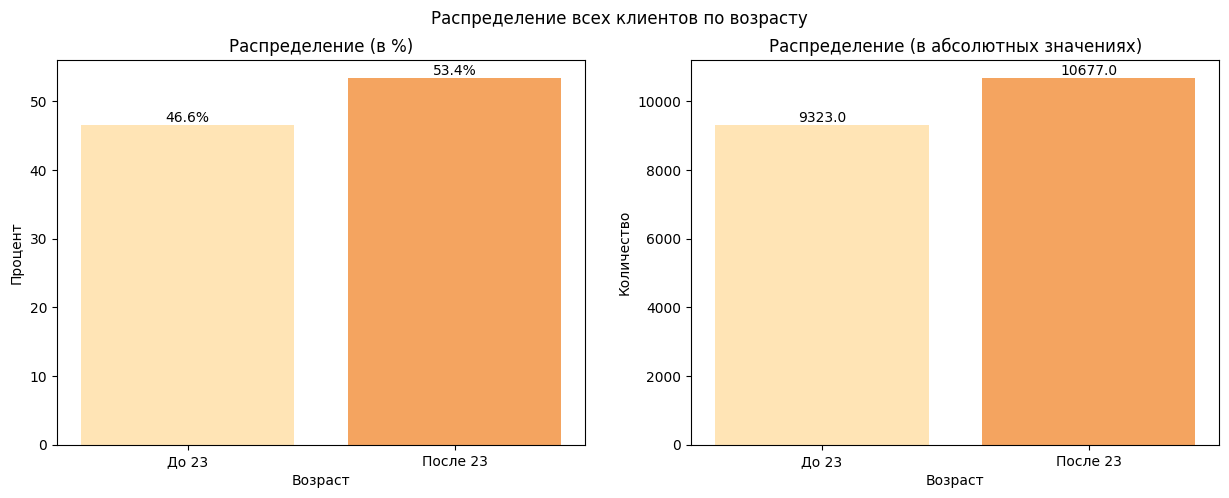

In [31]:
import matplotlib.pyplot as plt

count_up_23_all = data[data['Age'] < 23].shape[0]
count_up_23_all

count_after_23_all = data[data['Age'] >= 23].shape[0]
count_after_23_all

all_total = 20_000

# Процентное соотношение
count_up_23_all_percent = (count_up_23_all/ all_total) * 100
count_after_23_all_percent = (count_after_23_all/ all_total) * 100
labels = ['До 23', 'После 23']
values = [count_up_23_all_percent, count_after_23_all_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение всех клиентов по возрасту')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_up_23_all_percent, count_after_23_all_percent], color=['moccasin', 'sandybrown'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_up_23_all_percent, count_after_23_all_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_up_23_all, count_after_23_all], color=['moccasin', 'sandybrown'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_up_23_all, count_after_23_all]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

# # Показать графики
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Убедитесь, что заголовок не перекрывает графики
# plt.show()


## Распределение возраста среди группы A

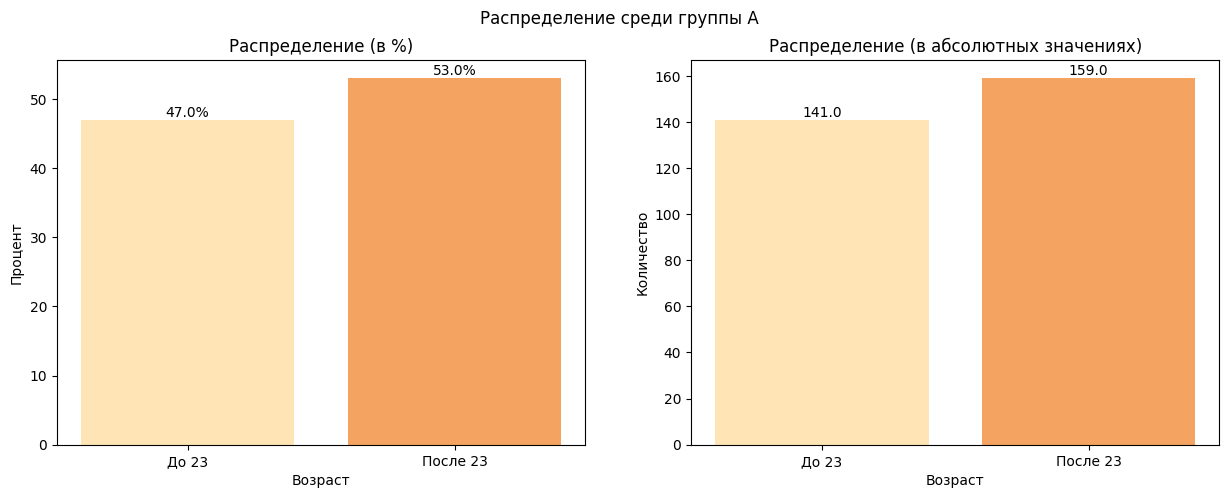

In [32]:
import matplotlib.pyplot as plt

all_total = 300

count_up_23_a = data[(data['Age'] < 23) & (data['A'] == 1)].shape[0]
count_up_23_a

count_after_23_a = data[(data['Age'] >= 23) & (data['A'] == 1)].shape[0]
count_after_23_a

# Процентное соотношение
count_up_23_a_percent = (count_up_23_a/ all_total) * 100
count_after_23_a_percent = (count_after_23_a/ all_total) * 100
labels = ['До 23', 'После 23']
values = [count_up_23_a_percent, count_after_23_a_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение среди группы A')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_up_23_a_percent, count_after_23_a_percent], color=['moccasin', 'sandybrown'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_up_23_a_percent, count_after_23_a_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_up_23_a, count_after_23_a], color=['moccasin', 'sandybrown'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_up_23_a, count_after_23_a]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

## Распределение возраста среди группы B

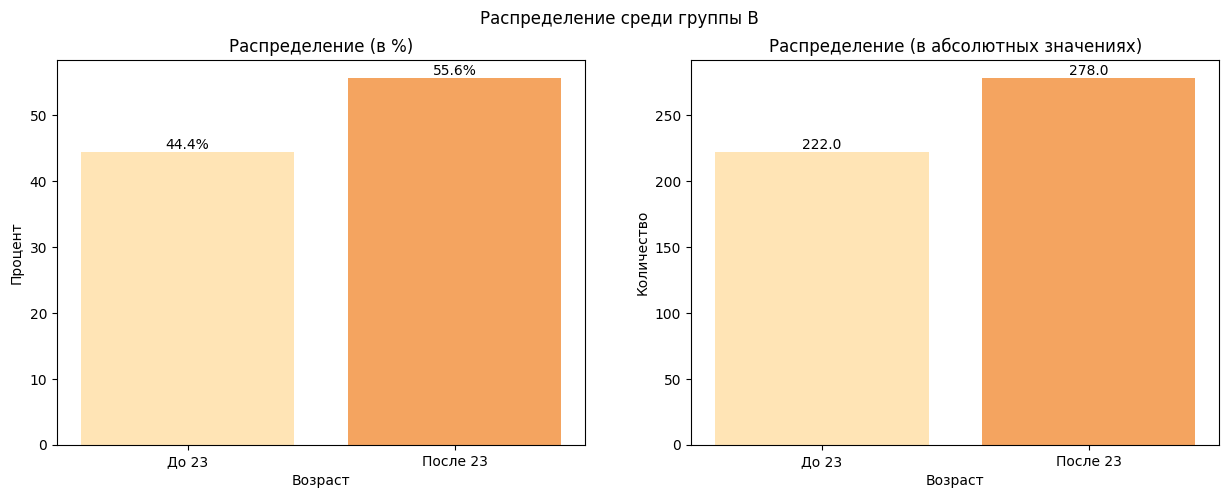

In [33]:
import matplotlib.pyplot as plt

all_total = 500

count_up_23_b = data[(data['Age'] < 23) & (data['B'] == 1)].shape[0]
count_up_23_b

count_after_23_b = data[(data['Age'] >= 23) & (data['B'] == 1)].shape[0]
count_after_23_b

# Процентное соотношение
count_up_23_b_percent = (count_up_23_b/ all_total) * 100
count_after_23_b_percent = (count_after_23_b/ all_total) * 100
labels = ['До 23', 'После 23']
values = [count_up_23_b_percent, count_after_23_b_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение среди группы B')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_up_23_b_percent, count_after_23_b_percent], color=['moccasin', 'sandybrown'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_up_23_b_percent, count_after_23_b_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_up_23_b, count_after_23_b], color=['moccasin', 'sandybrown'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_up_23_b, count_after_23_b]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

## Распределение возраста среди контрольной группы

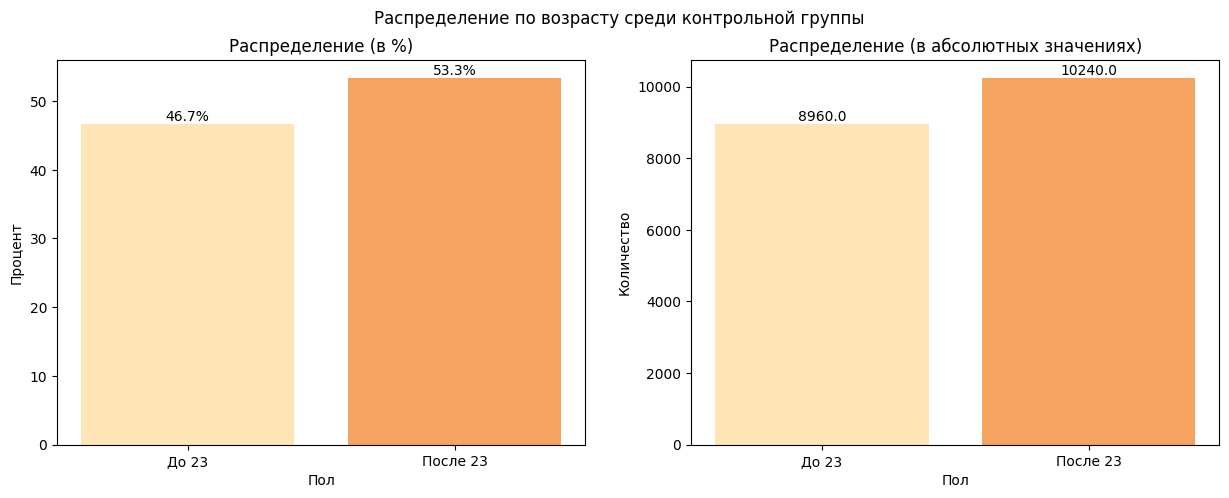

In [34]:
count_up_23_n = data[(data['Age'] < 23) & (data['A'] == 0) & (data['B'] == 0)].shape[0]
count_up_23_n

count_after_23_n = data[(data['Age'] >= 23) & (data['A'] == 0) & (data['B'] == 0)].shape[0]
count_after_23_n

n_total = 19_200

# Процентное соотношение
count_up_23_n_percent = (count_up_23_n/ n_total) * 100
count_after_23_n_percent = (count_after_23_n/ n_total) * 100
labels = ['До 23', 'После 23']
values = [count_up_23_n_percent, count_after_23_n_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение по возрасту среди контрольной группы')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_up_23_n_percent, count_after_23_n_percent], color=['moccasin', 'sandybrown'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Пол')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_up_23_n_percent, count_after_23_n_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_up_23_n, count_after_23_n], color=['moccasin', 'sandybrown'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Пол')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_up_23_n, count_after_23_n]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

# Задание 6 (Red)

## Распределение давних/недавних клиентов среди всех

## Распределение давних/недавних клиентов среди группы A

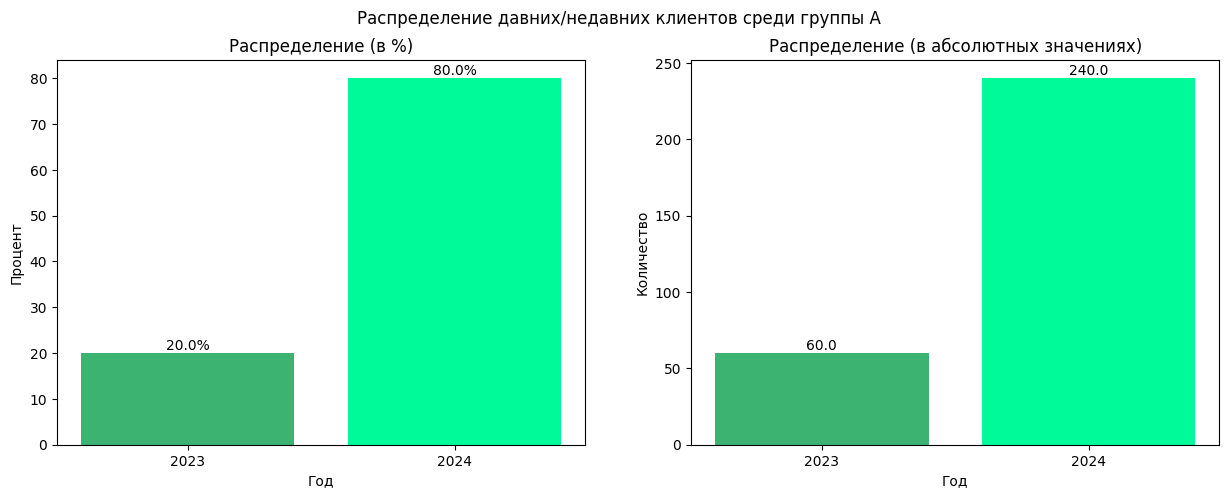

In [35]:
count_23_a = data[(data['ClientSince'] == 2023) & (data['A'] == 1)].shape[0]
count_23_a

count_24_a = data[(data['ClientSince'] == 2024) & (data['A'] == 1)].shape[0]
count_24_a

all_total = 300

# Процентное соотношение
count_23_a_percent = (count_23_a/ all_total) * 100
count_24_a_percent = (count_24_a/ all_total) * 100
labels = ['2023', '2024']
values = [count_23_a_percent, count_24_a_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение давних/недавних клиентов среди группы A')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_23_a_percent, count_24_a_percent], color=['mediumseagreen', 'mediumspringgreen'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_23_a_percent, count_24_a_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_23_a, count_24_a], color=['mediumseagreen', 'mediumspringgreen'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_23_a, count_24_a]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

## Распределение давних/недавних клиентов среди группы B

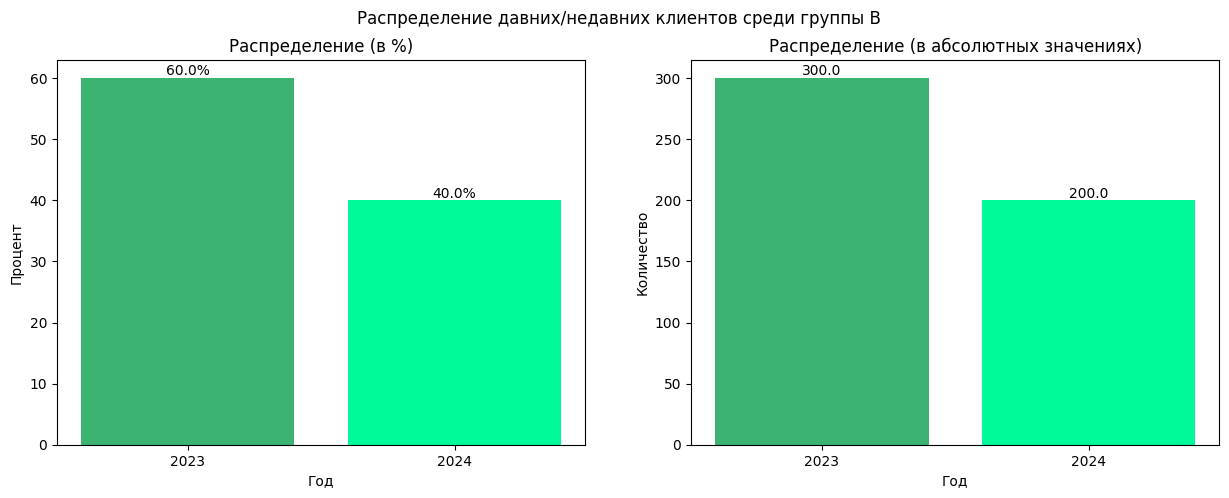

In [36]:
count_23_b = data[(data['ClientSince'] == 2023) & (data['B'] == 1)].shape[0]
count_23_b

count_24_b = data[(data['ClientSince'] == 2024) & (data['B'] == 1)].shape[0]
count_24_b

all_total = 500

# Процентное соотношение
count_23_b_percent = (count_23_b/ all_total) * 100
count_24_b_percent = (count_24_b/ all_total) * 100
labels = ['2023', '2024']
values = [count_23_b_percent, count_24_b_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение давних/недавних клиентов среди группы B')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_23_b_percent, count_24_b_percent], color=['mediumseagreen', 'mediumspringgreen'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_23_b_percent, count_24_b_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_23_b, count_24_b], color=['mediumseagreen', 'mediumspringgreen'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_23_b, count_24_b]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

## Распределение давних/недавних среди контрольной группы

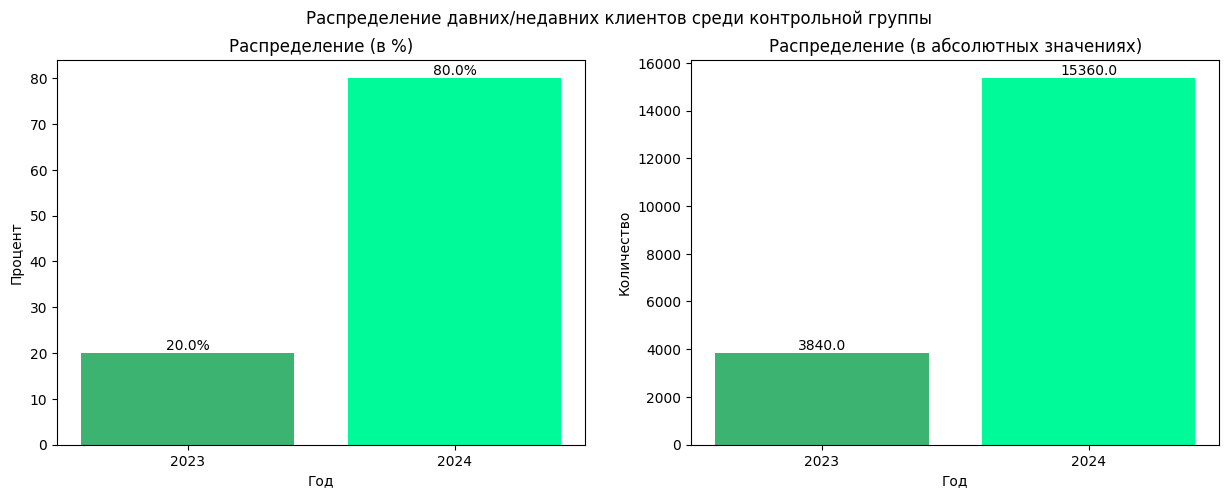

In [37]:
count_23_n = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0)].shape[0]
count_23_n

count_24_n = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0)].shape[0]
count_24_n

all_total = 19_200

# Процентное соотношение
count_23_n_percent = (count_23_n/ all_total) * 100
count_24_n_percent = (count_24_n/ all_total) * 100
labels = ['2023', '2024']
values = [count_23_n_percent, count_24_n_percent]

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Распределение давних/недавних клиентов среди контрольной группы')

# Первый график - процентное соотношение
axs[0].bar(labels, [count_23_n_percent, count_24_n_percent], color=['mediumseagreen', 'mediumspringgreen'])
axs[0].set_title('Распределение (в %)')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Процент')
for i, v in enumerate([count_23_n_percent, count_24_n_percent]):
    axs[0].text(i, v, f"{v:.1f}%", ha='center', va='bottom')

# Второй график - количество
axs[1].bar(labels, [count_23_n, count_24_n], color=['mediumseagreen', 'mediumspringgreen'])
axs[1].set_title('Распределение (в абсолютных значениях)')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Количество')
for i, v in enumerate([count_23_n, count_24_n]):
    axs[1].text(i, v, f"{v:.1f}", ha='center', va='bottom')

#Задание 7 (Black)

##Конверсии рекламной компании А

2023 год

In [38]:
count_23_a
print(f'Количество клиентов, привлечённых в 2023 году: {count_23_a}')

Количество клиентов, привлечённых в 2023 году: 60


In [39]:
purch_2023_a = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Purchased'] == 1)].shape[0]
print(f'Количество покупателей, привлечённых в 2023 году: {purch_2023_a}')

Количество покупателей, привлечённых в 2023 году: 12


In [40]:
conversion_a_23 = purch_2023_a / count_23_a * 100
print(f'Конверсия в 2023 году: {conversion_a_23}')

Конверсия в 2023 году: 20.0




---



2024 год

In [41]:
count_24_a
print(f'Количество клиентов, привлечённых в 2024 году: {count_24_a}')

Количество клиентов, привлечённых в 2024 году: 240


In [42]:
purch_2024_a = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Purchased'] == 1)].shape[0]
print(f'Количество покупателей, привлечённых в 2024 году: {purch_2024_a}')

Количество покупателей, привлечённых в 2024 году: 21


In [43]:
conversion_a_24 = purch_2024_a / count_24_a * 100
print(f'Конверсия в 2024 году: {conversion_a_24}')

Конверсия в 2024 году: 8.75


##Конверсии рекламной компании B

2023 год

In [44]:
count_23_b
print(f'Количество клиентов, привлечённых в 2023 году: {count_23_b}')

Количество клиентов, привлечённых в 2023 году: 300


In [45]:
purch_2023_b = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Purchased'] == 1)].shape[0]
print(f'Количество покупателей, привлечённых в 2023 году: {purch_2023_b}')

Количество покупателей, привлечённых в 2023 году: 60


In [46]:
conversion_b_23 = purch_2023_b / count_23_b * 100
print(f'Конверсия в 2023 году: {conversion_b_23}')

Конверсия в 2023 году: 20.0




---



2024 год

In [47]:
count_24_b
print(f'Количество клиентов, привлечённых в 2024 году: {count_24_b}')

Количество клиентов, привлечённых в 2024 году: 200


In [48]:
purch_2024_b = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Purchased'] == 1)].shape[0]
print(f'Количество покупателей, привлечённых в 2024 году: {purch_2024_b}')

Количество покупателей, привлечённых в 2024 году: 6


In [49]:
conversion_b_24 = purch_2024_b / count_24_b * 100
print(f'Конверсия в 2024 году: {conversion_b_24}')

Конверсия в 2024 году: 3.0


##Естественная конверсия клиентов разных годов



2023 год

In [50]:
count_23_all_n = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0)].shape[0]
print(f'Количество клиентов, естественно пришедших в 2023 году: {count_23_all_n}')

Количество клиентов, естественно пришедших в 2023 году: 3840


In [51]:
purch_2023_n = data[(data['ClientSince'] == 2023)& (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1)].shape[0]
print(f'Количество покупателей, естественно пришедших в 2023 году: {purch_2023_n}')

Количество покупателей, естественно пришедших в 2023 году: 768


In [52]:
conversion_all_23_n = purch_2023_n / count_23_all_n * 100
print(f'Конверсия в 2023 году: {conversion_all_23_n}')

Конверсия в 2023 году: 20.0




---



2024 год

In [53]:
count_24_all_n = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0)].shape[0]
print(f'Количество клиентов, естественно пришедших в 2024 году: {count_24_all_n}')

Количество клиентов, естественно пришедших в 2024 году: 15360


In [54]:
purch_2024_n = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) &(data['Purchased'] == 1)].shape[0]
print(f'Количество покупателей, естественно пришедших в 2024 году: {purch_2024_n}')

Количество покупателей, естественно пришедших в 2024 году: 460


In [55]:
conversion_all_24_n = purch_2024_n / count_24_all_n * 100
print(f'Конверсия в 2023 году: {conversion_all_24_n}')

Конверсия в 2023 году: 2.994791666666667


## График

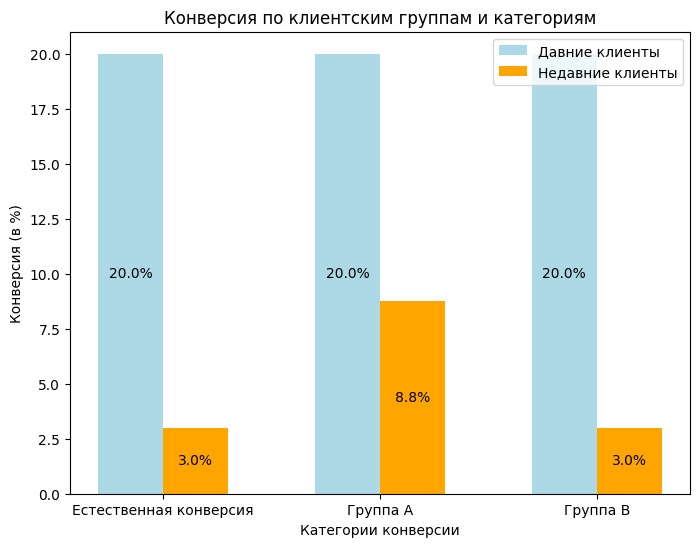

In [56]:
labels = ['Естественная конверсия', 'Группа A', 'Группа B']
conversion_24 = [conversion_all_24_n, conversion_a_24, conversion_b_24]
conversion_23 = [conversion_all_23_n, conversion_a_23, conversion_b_23]

fig, ax = plt.subplots(figsize=(8, 6))

width = 0.3
x = range(len(labels))

rect2 = ax.bar([p - width/2 for p in x], conversion_23, width=width, label='Давние клиенты', color='lightblue')
rect1 = ax.bar([p + width/2 for p in x], conversion_24, width=width, label='Недавние клиенты', color='orange')



ax.set_title('Конверсия по клиентским группам и категориям')
ax.set_xlabel('Категории конверсии')
ax.set_ylabel('Конверсия (в %)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.bar_label(rect2, label_type='center', fmt='%.1f%%')
plt.bar_label(rect1, label_type='center', fmt='%.1f%%')
ax.legend()

# Задание 8 (black)

## Конверсия клиентов из группы A (сорт по давности привлечения и полам)

In [57]:
count_23_a_male = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Gender'] == 'Male')].shape[0]
print(f'Количество клиентов-мужчин, привлечённых в 2023 году: {count_23_a_male}')

Количество клиентов-мужчин, привлечённых в 2023 году: 30


In [58]:
count_23_a_female = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Gender'] == 'Female')].shape[0]
print(f'Количество клиентов-женщин, привлечённых в 2023 году: {count_23_a_female}')

Количество клиентов-женщин, привлечённых в 2023 году: 30




---



In [59]:
purch_2023_a_male = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Male')].shape[0]
print(f'Количество покупателей-мужчин, привлечённых в 2023 году: {purch_2023_a_male}')

Количество покупателей-мужчин, привлечённых в 2023 году: 6


In [60]:
purch_2023_a_female = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Female')].shape[0]
print(f'Количество покупателей-женщин, привлечённых в 2023 году: {purch_2023_a_female}')

Количество покупателей-женщин, привлечённых в 2023 году: 6




---



In [61]:
conversion_a_23_female = purch_2023_a_female / count_23_a_female * 100
print(f'Конверсия для женщин в 2024 году: {conversion_a_23_female}')

Конверсия для женщин в 2024 году: 20.0


In [62]:
conversion_a_23_male = purch_2023_a_male / count_23_a_male * 100
print(f'Конверсия для мужчин в 2024 году: {conversion_a_23_male}')

Конверсия для мужчин в 2024 году: 20.0




---





---



In [63]:
count_24_a_male = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Gender'] == 'Male')].shape[0]
print(f'Количество клиентов-мужчин, привлечённых в 2024 году: {count_24_a_male}')

Количество клиентов-мужчин, привлечённых в 2024 году: 130


In [64]:
count_24_a_female = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Gender'] == 'Female')].shape[0]
print(f'Количество клиентов-женщин, привлечённых в 2024 году: {count_24_a_female}')

Количество клиентов-женщин, привлечённых в 2024 году: 110




---



In [65]:
purch_2024_a_female = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Female')].shape[0]
print(f'Количество покупателей-мужчин, привлечённых в 2024 году: {purch_2024_a_female}')

Количество покупателей-мужчин, привлечённых в 2024 году: 13


In [66]:
purch_2024_a_male = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Male')].shape[0]
print(f'Конверсия для мужчин в 2024 году: {purch_2024_a_male}')

Конверсия для мужчин в 2024 году: 8




---



In [67]:
conversion_a_24_female = purch_2024_a_female / count_24_a_female * 100
print(f'Конверсия для женщин в 2024 году: {conversion_a_24_female}')

Конверсия для женщин в 2024 году: 11.818181818181818


In [68]:
conversion_a_24_male = purch_2024_a_male / count_24_a_male * 100
print(f'Конверсия для мужчин в 2024 году: {conversion_a_24_male}')

Конверсия для мужчин в 2024 году: 6.153846153846154


## Конверсия клиентов из группы A (сорт по давности привлечения и возрастным группам)

In [69]:
count_23_a_up_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Age'] < 23)].shape[0]
print(f'Количество клиентов до 23, привлечённых в 2023 году: {count_23_a_up_23}')

Количество клиентов до 23, привлечённых в 2023 году: 28


In [70]:
count_23_a_after_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Age'] >= 23)].shape[0]
print(f'Количество клиентов после 23, привлечённых в 2023 году: {count_23_a_after_23}')

Количество клиентов после 23, привлечённых в 2023 году: 32




---



In [71]:
purch_2023_a_up_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Age'] < 23)].shape[0]
print(f'Количество покупателей до 23, привлечённых в 2023 году: {purch_2023_a_up_23}')

Количество покупателей до 23, привлечённых в 2023 году: 5


In [72]:
purch_2023_a_after_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Age'] >= 23)].shape[0]
print(f'Количество покупателей после 23, привлечённых в 2023 году: {purch_2023_a_after_23}')

Количество покупателей после 23, привлечённых в 2023 году: 7




---



In [73]:
conversion_a_23_up_23 = purch_2023_a_up_23 / count_23_a_up_23 * 100
print(f'Конверсия для покупателей до 23 в 2023 году: {conversion_a_23_up_23}')

Конверсия для покупателей до 23 в 2023 году: 17.857142857142858


In [74]:
conversion_a_23_after_23 = purch_2023_a_after_23 / count_23_a_after_23 * 100
print(f'Конверсия для покупателей после 23 в 2023 году: {conversion_a_23_after_23}')

Конверсия для покупателей после 23 в 2023 году: 21.875




---





---



In [75]:
count_24_a_after_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Age'] >= 23)].shape[0]
print(f'Количество клиентов до 23, привлечённых в 2024 году: {count_24_a_after_23}')

Количество клиентов до 23, привлечённых в 2024 году: 127


In [76]:
count_24_a_up_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Age'] < 23)].shape[0]
print(f'Количество клиентов после 23, привлечённых в 2024 году: {count_24_a_up_23}')

Количество клиентов после 23, привлечённых в 2024 году: 113




---



In [77]:
purch_2024_a_up_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Age'] < 23)].shape[0]
purch_2024_a_up_23

8

In [78]:
purch_2024_a_after_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 1) & (data['Purchased'] == 1) & (data['Age'] >= 23)].shape[0]
purch_2024_a_after_23

13



---



In [79]:
conversion_a_24_after_23 = purch_2024_a_after_23 / count_24_a_after_23 * 100
conversion_a_24_after_23

10.236220472440944

In [80]:
conversion_a_24_up_23 = purch_2024_a_up_23 / count_24_a_up_23 * 100
conversion_a_24_up_23

7.079646017699115

In [81]:
count_23_b

300

In [82]:
purch_2023_b = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Purchased'] == 1)].shape[0]
purch_2023_b

60

In [83]:
conversion_b_23 = purch_2023_b / count_23_b * 100
conversion_b_23

20.0



---



In [84]:
count_24_b

200

In [85]:
purch_2024_b = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Purchased'] == 1)].shape[0]
purch_2024_b

6

In [86]:
conversion_b_24 = purch_2024_b / count_24_b * 100
conversion_b_24

3.0

## Конверсия клиентов из группы A (сорт по давности привлечения и полам)

> Добавить блок с цитатой



In [87]:
count_23_b_male = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Gender'] == 'Male')].shape[0]
count_23_b_male

166

In [88]:
count_23_b_female = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Gender'] == 'Female')].shape[0]
count_23_b_female

134



---



In [89]:
purch_2023_b_female = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Female')].shape[0]
purch_2023_b_female

25

In [90]:
purch_2023_b_male = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Male')].shape[0]
purch_2023_b_male

35



---



In [91]:
conversion_b_23_female = purch_2023_b_female / count_23_b_female * 100
conversion_b_23_female

18.65671641791045

In [92]:
conversion_b_23_male = purch_2023_b_male / count_23_b_male * 100
conversion_b_23_male

21.084337349397593



---





---



In [93]:
count_24_b_male = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Gender'] == 'Male')].shape[0]
count_24_b_male

95

In [94]:
count_24_b_female = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Gender'] == 'Female')].shape[0]
count_24_b_female

105



---



In [95]:
purch_2024_b_female = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Female')].shape[0]
purch_2024_b_female

4

In [96]:
purch_2024_b_male = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Gender'] == 'Male')].shape[0]
purch_2024_b_male

2



---



In [97]:
conversion_b_24_female = purch_2024_b_female / count_24_b_female * 100
conversion_b_24_female

3.8095238095238098

In [98]:
conversion_b_24_male = purch_2024_b_male / count_24_b_male * 100
conversion_b_24_male

2.1052631578947367

## Конверсия клиентов из группы B (сорт по давности привлечения и возрастным группам)

In [99]:
count_23_b_after_23 = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Age'] >= 23)].shape[0]
count_23_b_after_23

160

In [100]:
count_23_b_up_23 = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Age'] < 23)].shape[0]
count_23_b_up_23

140



---



In [101]:
purch_2023_b_up_23 = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Age'] < 23)].shape[0]
purch_2023_b_up_23

29

In [102]:
purch_2023_b_after_23 = data[(data['ClientSince'] == 2023) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Age'] >= 23)].shape[0]
purch_2023_b_after_23

31



---



In [103]:
conversion_b_23_up_23 = purch_2023_b_up_23 / count_23_b_up_23 * 100
conversion_b_23_up_23

20.714285714285715

In [104]:
conversion_b_23_after_23 = purch_2023_b_after_23 / count_23_b_after_23 * 100
conversion_b_23_after_23

19.375



---





---



In [105]:
count_24_b_after_23 = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Age'] >= 23)].shape[0]
count_24_b_after_23

118

In [106]:
count_24_b_up_23 = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Age'] < 23)].shape[0]
count_24_b_up_23

82



---



In [107]:
purch_2024_b_up_23 = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Age'] < 23)].shape[0]
purch_2024_b_up_23

3

In [108]:
purch_2024_b_after_23 = data[(data['ClientSince'] == 2024) & (data['B'] == 1) & (data['Purchased'] == 1) & (data['Age'] >= 23)].shape[0]
purch_2024_b_after_23

3



---



In [109]:
conversion_b_24_after_23 = purch_2024_b_after_23 / count_24_b_after_23 * 100
conversion_b_24_after_23

2.5423728813559325

In [110]:
conversion_b_24_up_23 = purch_2024_b_up_23 / count_24_b_up_23 * 100
conversion_b_24_up_23

3.6585365853658534

## Естественная конверсия (сорт по давности привлечения и полам)

In [111]:
count_23_all_male = data[(data['ClientSince'] == 2023)& (data['A'] == 0) & (data['B'] == 0) & (data['Gender'] == 'Male')].shape[0]
count_23_all_male

1973

In [112]:
count_23_all_female = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0)  &(data['Gender'] == 'Female')].shape[0]
count_23_all_female

1867



---



In [113]:
purch_2023_all_female = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Gender'] == 'Female')].shape[0]
purch_2023_all_female

377

In [114]:
purch_2023_all_male = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Gender'] == 'Male')].shape[0]
purch_2023_all_male

391



---



In [115]:
conversion_all_23_female = purch_2023_all_female / count_23_all_female * 100
conversion_all_23_female

20.192822710230317

In [116]:
conversion_all_23_male = purch_2023_all_male / count_23_all_male * 100
conversion_all_23_male

19.81753674607197



---





---



In [117]:
count_24_all_male = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Gender'] == 'Male')].shape[0]
count_24_all_male

7727

In [118]:
count_24_all_female = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Gender'] == 'Female')].shape[0]
count_24_all_female

7633



---



In [119]:
purch_2024_all_female = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Gender'] == 'Female')].shape[0]
purch_2024_all_female

234

In [120]:
purch_2024_all_male = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Gender'] == 'Male')].shape[0]
purch_2024_all_male

226



---



In [121]:
conversion_all_24_female = purch_2024_all_female / count_24_all_female * 100
conversion_all_24_female

3.0656360539761565

In [122]:
conversion_all_24_male = purch_2024_all_male / count_24_all_male * 100
conversion_all_24_male

2.9248091109097967

## Естественная конверсия (сорт по давности привлечения и возрастным группам)

In [123]:
count_23_all_after_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0)& (data['Age'] >= 23)].shape[0]
count_23_all_after_23

2074

In [124]:
count_23_all_up_23 = data[(data['ClientSince'] == 2023) &( data['A'] == 0) & (data['B'] == 0) & (data['Age'] < 23)].shape[0]
count_23_all_up_23

1766



---



In [125]:
purch_2023_all_up_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Age'] < 23)].shape[0]
purch_2023_all_up_23

358

In [126]:
purch_2023_all_after_23 = data[(data['ClientSince'] == 2023) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Age'] >= 23)].shape[0]
purch_2023_all_after_23

410



---



In [127]:
conversion_all_23_up_23 = purch_2023_all_up_23 / count_23_all_up_23 * 100
conversion_all_23_up_23

20.2718006795017

In [128]:
conversion_all_23_after_23 = purch_2023_all_after_23 / count_23_all_after_23 * 100
conversion_all_23_after_23

19.768563162970107



---





---



In [129]:
count_24_all_after_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Age'] >= 23)].shape[0]
count_24_all_after_23

8166

In [130]:
count_24_all_up_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Age'] < 23)].shape[0]
count_24_all_up_23

7194



---



In [131]:
purch_2024_all_up_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Age'] < 23)].shape[0]
purch_2024_all_up_23

232

In [132]:
purch_2024_all_after_23 = data[(data['ClientSince'] == 2024) & (data['A'] == 0) & (data['B'] == 0) & (data['Purchased'] == 1) & (data['Age'] >= 23)].shape[0]
purch_2024_all_after_23

228



---



In [133]:
conversion_all_24_after_23 = purch_2024_all_after_23 / count_24_all_after_23 * 100
conversion_all_24_after_23

2.792064658339456

In [134]:
conversion_all_24_up_23 = purch_2024_all_up_23 / count_24_all_up_23 * 100
conversion_all_24_up_23

3.2249096469279954

## Графики

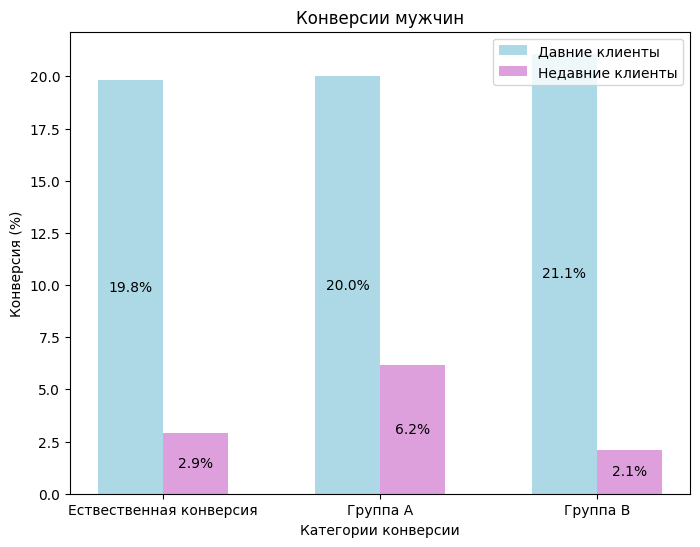

In [135]:
labels = ['Ествественная конверсия', 'Группа A', 'Группа B']
male_conversion_24 = [conversion_all_24_male, conversion_a_24_male, conversion_b_24_male]
male_conversion_23 = [conversion_all_23_male, conversion_a_23_male, conversion_b_23_male]

fig, ax = plt.subplots(figsize=(8, 6))

width = 0.3
x = range(len(labels))

rect2 = ax.bar([p - width/2 for p in x], male_conversion_23, width=width, label='Давние клиенты', color='lightblue')
rect1 = ax.bar([p + width/2 for p in x], male_conversion_24, width=width, label='Недавние клиенты', color='plum')



ax.set_title('Конверсии мужчин')
ax.set_xlabel('Категории конверсии')
ax.set_ylabel('Конверсия (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.bar_label(rect2, label_type='center', fmt='%.1f%%')
plt.bar_label(rect1, label_type='center', fmt='%.1f%%')
ax.legend()
plt.show()

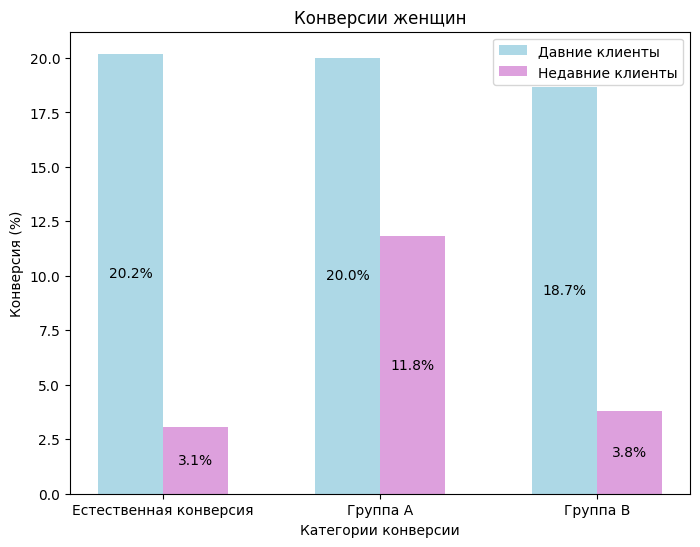

In [136]:
labels = ['Естественная конверсия', 'Группа A', 'Группа B']
female_conversion_24 = [conversion_all_24_female, conversion_a_24_female, conversion_b_24_female]
female_conversion_23 = [conversion_all_23_female, conversion_a_23_female, conversion_b_23_female]

fig, ax = plt.subplots(figsize=(8, 6))

width = 0.3
x = range(len(labels))

rect2 = ax.bar([p - width/2 for p in x], female_conversion_23, width=width, label='Давние клиенты', color='lightblue')
rect1 = ax.bar([p + width/2 for p in x], female_conversion_24, width=width, label='Недавние клиенты', color='plum')



ax.set_title('Конверсии женщин')
ax.set_xlabel('Категории конверсии')
ax.set_ylabel('Конверсия (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.bar_label(rect2, label_type='center', fmt='%.1f%%')
plt.bar_label(rect1, label_type='center', fmt='%.1f%%')
ax.legend()

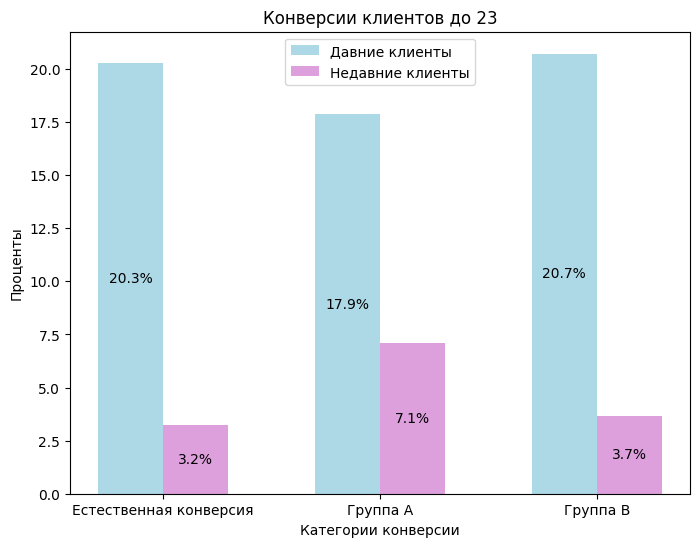

In [137]:
labels = ['Естественная конверсия', 'Группа A', 'Группа B']
up_23_conversion_24 = [conversion_all_24_up_23, conversion_a_24_up_23, conversion_b_24_up_23]
up_23_conversion_23 = [conversion_all_23_up_23, conversion_a_23_up_23, conversion_b_23_up_23]

fig, ax = plt.subplots(figsize=(8, 6))

width = 0.3
x = range(len(labels))

rect2 = ax.bar([p - width/2 for p in x], up_23_conversion_23, width=width, label='Давние клиенты', color='lightblue')
rect1 = ax.bar([p + width/2 for p in x], up_23_conversion_24, width=width, label='Недавние клиенты', color='plum')

ax.set_title('Конверсии клиентов до 23')
ax.set_xlabel('Категории конверсии')
ax.set_ylabel('Проценты')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.bar_label(rect2, label_type='center', fmt='%.1f%%')
plt.bar_label(rect1, label_type='center', fmt='%.1f%%')
ax.legend()
plt.show()

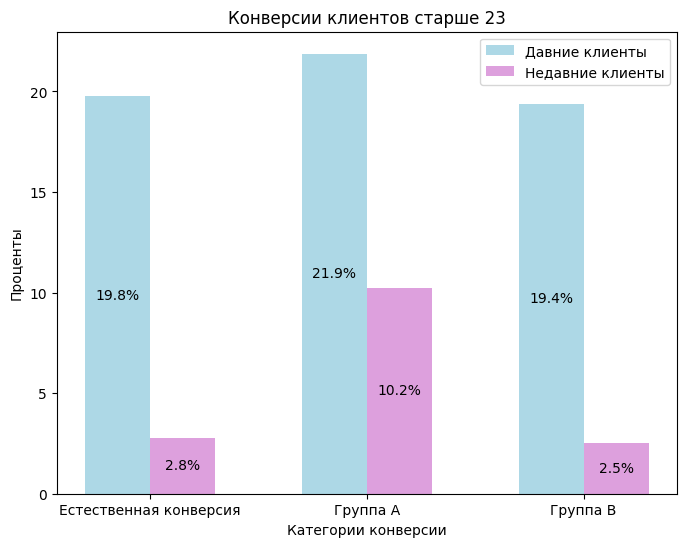

In [138]:
labels = ['Естественная конверсия', 'Группа A', 'Группа B']
after_23_conversion_24 = [conversion_all_24_after_23, conversion_a_24_after_23, conversion_b_24_after_23]
after_23_conversion_23 = [conversion_all_23_after_23, conversion_a_23_after_23, conversion_b_23_after_23]

fig, ax = plt.subplots(figsize=(8, 6))

width = 0.3
x = range(len(labels))

rect2 = ax.bar([p - width/2 for p in x], after_23_conversion_23, width=width, label='Давние клиенты', color='lightblue')
rect1 = ax.bar([p + width/2 for p in x], after_23_conversion_24, width=width, label='Недавние клиенты', color='plum')



ax.set_title('Конверсии клиентов старше 23')
ax.set_xlabel('Категории конверсии')
ax.set_ylabel('Проценты')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.bar_label(rect2, label_type='center', fmt='%.1f%%')
plt.bar_label(rect1, label_type='center', fmt='%.1f%%')
ax.legend()

# Задание 9 (black)

In [139]:
df_a = data['A'].fillna(0)
df_b = data['B'].fillna(0)
df_others = data[(data['A']!=1) & (data['B']!=1)]
df_others = df_others.fillna(0)

In [140]:
a_2023_less23_f = 3 / (3+11)
a_2023_big23_f = 3 / (3+13)
a_2023_less23_m = 2 / (2+12)
a_2023_big23_m = 4 / (4+12)
a_2024_less23_f = 6 / (6+48)
a_2024_big23_f = 7 / (7+49)
a_2024_less23_m = 2 / (2+57)
a_2024_big23_m = 6 / (6+65)

In [141]:
c_2023_less23_f = 190+690
c_2023_big23_f = 187+800
c_2023_less23_m = 168+718
c_2023_big23_m = 223+864
c_2024_less23_f = 114+3453
c_2024_big23_f = 120+3946
c_2024_less23_m = 118+3509
c_2024_big23_m = 108+3992

In [142]:
control_2023_less23_f = 190 / (190+690)
control_2023_big23_f = 187 / (187+800)
control_2023_less23_m = 168 / (168+718)
control_2023_big23_m = 223 / (223+864)
control_2024_less23_f = 114 / (114+3453)
control_2024_big23_f = 120 / (120+3946)
control_2024_less23_m = 118 / (118+3509)
control_2024_big23_m = 108 / (108+3992)

* 2023 год, до 23 лет, женский пол

In [143]:
from math import *
buys_2023_less23_f = max(0, floor((a_2023_less23_f - control_2023_less23_f) * c_2023_less23_f))
income_2023_less23_f = 3000 * buys_2023_less23_f
expense_2023_less23_f = 80 * c_2023_less23_f
profit_2023_less23_f = income_2023_less23_f - expense_2023_less23_f
profit_2023_less23_f

-70400

* 2023 год, 23 и больше лет, женский пол

In [144]:
buys_2023_big23_f = max(0, floor((a_2023_big23_f - control_2023_big23_f) * c_2023_big23_f))
income_2023_big23_f = 3000 * buys_2023_big23_f
expense_2023_big23_f = 80 * c_2023_big23_f
profit_2023_big23_f = income_2023_big23_f - expense_2023_big23_f
profit_2023_big23_f

-78960

* 2023 год, до 23 лет, мужской пол

In [145]:
buys_2023_less23_m = max(0, floor((a_2023_less23_m - control_2023_less23_m) * c_2023_less23_m))
income_2023_less23_m = 3000 * buys_2023_less23_m
expense_2023_less23_m = 80 * c_2023_less23_m
profit_2023_less23_m = income_2023_less23_m - expense_2023_less23_m
profit_2023_less23_m

-70880

* 2023 год, 23 и больше лет, мужской пол

In [146]:
buys_2023_big23_m = max(0, floor((a_2023_big23_m - control_2023_big23_m) * c_2023_big23_m))
income_2023_big23_m = 3000 * buys_2023_big23_m
expense_2023_big23_m = 80 * c_2023_big23_m
profit_2023_big23_m = income_2023_big23_m - expense_2023_big23_m
profit_2023_big23_m

57040

* 2024 год, до 23 лет, женский пол

In [147]:
buys_2024_less23_f = max(0, floor((a_2024_less23_f - control_2024_less23_f) * c_2024_less23_f))
income_2024_less23_f = 3000 * buys_2024_less23_f
expense_2024_less23_f = 80 * c_2024_less23_f
profit_2024_less23_f = income_2024_less23_f - expense_2024_less23_f
profit_2024_less23_f

560640

* 2024 год, 23 и больше лет, женский пол

In [148]:
buys_2024_big23_f = max(0, floor((a_2024_big23_f - control_2024_big23_f) * c_2024_big23_f))
income_2024_big23_f = 3000 * buys_2024_big23_f
expense_2024_big23_f = 80 * c_2024_big23_f
profit_2024_big23_f = income_2024_big23_f - expense_2024_big23_f
profit_2024_big23_f

838720

* 2024 год, до 23 лет, мужской пол

In [149]:
buys_2024_less23_m = max(0, floor((a_2024_less23_m - control_2024_less23_m) * c_2024_less23_m))
income_2024_less23_m = 3000 * buys_2024_less23_m
expense_2024_less23_m = 80 * c_2024_less23_m
profit_2024_less23_m = income_2024_less23_m - expense_2024_less23_m
profit_2024_less23_m

-278160

* 2023 год, 23 и больше лет, мужской пол

In [150]:
buys_2024_big23_m = max(0, floor((a_2024_big23_m - control_2024_big23_m) * c_2024_big23_m))
income_2024_big23_m = 3000 * buys_2024_big23_m
expense_2024_big23_m = 80 * c_2024_big23_m
profit_2024_big23_m = income_2024_big23_m - expense_2024_big23_m
profit_2024_big23_m

386000

Построим график с прибылью от каждой категории по давности, возрасту и полу

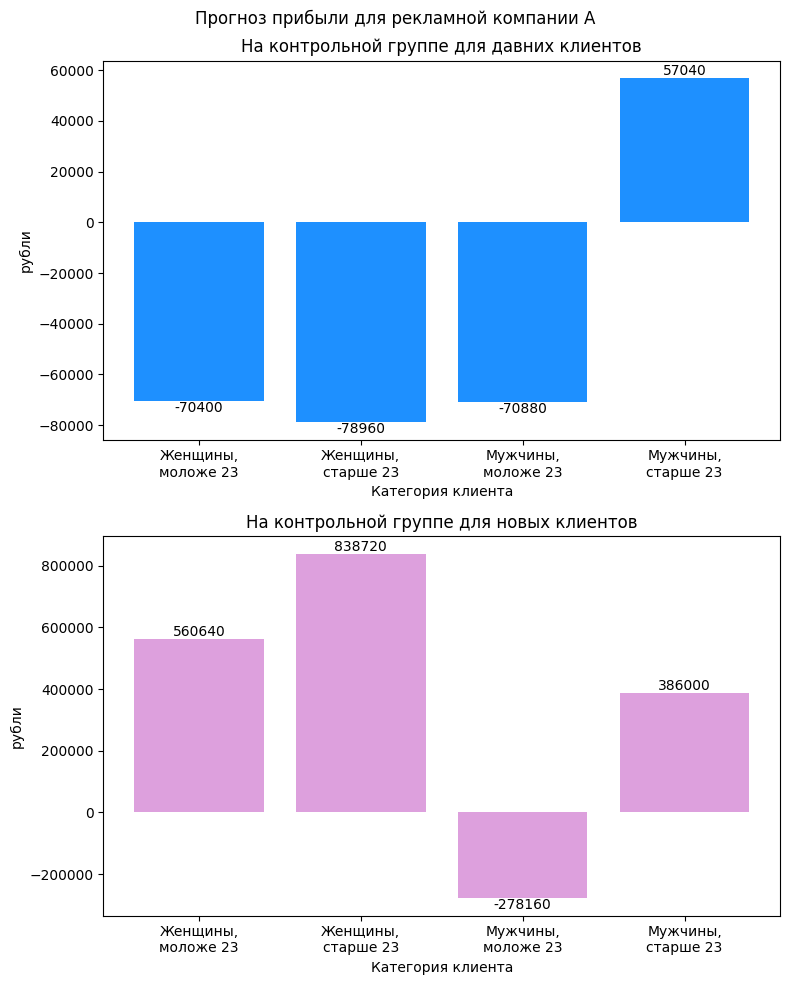

In [151]:
import matplotlib.pyplot as plt

# Данные для графиков
labels = [
    'Женщины,\nмоложе 23', 'Женщины,\nстарше 23', 'Мужчины,\nмоложе 23', 'Мужчины,\nстарше 23'
]
profits = [
    profit_2023_less23_f, profit_2023_big23_f,
    profit_2023_less23_m, profit_2023_big23_m,
    profit_2024_less23_f, profit_2024_big23_f,
    profit_2024_less23_m, profit_2024_big23_m,
]

# Разделение данных на две группы
D_labels = labels  # Первые четыре метки (Д_<...>)
D_profits = profits[:4]  # Соответствующие прибыли

N_labels = labels  # Последние четыре метки (Н_<...>)
N_profits = profits[4:]  # Соответствующие прибыли

# Создание фигуры и подграфиков
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
fig.suptitle('Прогноз прибыли для рекламной компании A')
plot_a = ax1.bar(D_labels, D_profits, color='dodgerblue')
ax1.set_xlabel('Категория клиента')
ax1.set_ylabel('рубли')
ax1.set_title('На контрольной группе для давних клиентов')
ax1.tick_params(axis='x')
ax1.bar_label(plot_a, label_type='edge')

plot_b = ax2.bar(N_labels, N_profits, color='plum')
ax2.set_xlabel('Категория клиента')
ax2.set_ylabel('рубли')
ax2.set_title('На контрольной группе для новых клиентов')
ax2.tick_params(axis='x')
ax2.bar_label(plot_b, label_type='edge')

# Настройка расположения графиков
plt.tight_layout()

# Сохранение и отображение графиков
plt.savefig('3_1')
plt.show()

# Расчёт максимальной прибыли

In [152]:
total_profit = profit_2024_less23_f + profit_2024_big23_f + profit_2024_big23_m + profit_2023_big23_m
print(total_profit)

1842400


**Прогноз от рекламы B на контрольной группе**

In [153]:
b_2023_less23_f = 12 / (12+51)
b_2023_big23_f = 13 / (13+58)
b_2023_less23_m = 17 / (17+60)
b_2023_big23_m = 18 / (18+71)
b_2024_less23_f = 2 / (2+38)
b_2024_big23_f = 2 / (2+63)
b_2024_less23_m = 1 / (1+41)
b_2024_big23_m = 1 / (1+52)

* 2023 год, до 23 лет, женский пол

In [154]:
buys_2023_less23_f = max(0, floor((b_2023_less23_f - control_2023_less23_f) * c_2023_less23_f))
income_2023_less23_f = 3000 * buys_2023_less23_f
expense_2023_less23_f = 80 * c_2023_less23_f
profit_2023_less23_f = income_2023_less23_f - expense_2023_less23_f
profit_2023_less23_f

-70400

* 2023 год, 23 и больше лет, женский пол

In [155]:
buys_2023_big23_f = max(0, floor((b_2023_big23_f - control_2023_big23_f) * c_2023_big23_f))
income_2023_big23_f = 3000 * buys_2023_big23_f
expense_2023_big23_f = 80 * c_2023_big23_f
profit_2023_big23_f = income_2023_big23_f - expense_2023_big23_f
profit_2023_big23_f

-78960

* 2023 год, до 23 лет, мужской пол

In [156]:
buys_2023_less23_m = max(0, floor((b_2023_less23_m - control_2023_less23_m) * c_2023_less23_m))
income_2023_less23_m = 3000 * buys_2023_less23_m
expense_2023_less23_m = 80 * c_2023_less23_m
profit_2023_less23_m = income_2023_less23_m - expense_2023_less23_m
profit_2023_less23_m

10120

* 2023 год, 23 и больше лет, мужской пол

In [157]:
buys_2023_big23_m = max(0, floor((b_2023_big23_m - control_2023_big23_m) * c_2023_big23_m))
income_2023_big23_m = 3000 * buys_2023_big23_m
expense_2023_big23_m = 80 * c_2023_big23_m
profit_2023_big23_m = income_2023_big23_m - expense_2023_big23_m
profit_2023_big23_m

-86960

* 2024 год, до 23 лет, женский пол

In [158]:
buys_2024_less23_f = max(0, floor((b_2024_less23_f - control_2024_less23_f) * c_2024_less23_f))
income_2024_less23_f = 3000 * buys_2024_less23_f
expense_2024_less23_f = 80 * c_2024_less23_f
profit_2024_less23_f = income_2024_less23_f - expense_2024_less23_f
profit_2024_less23_f

-93360

* 2024 год, 23 и больше лет, женский пол

In [159]:
buys_2024_big23_f = max(0, floor((b_2024_big23_f - control_2024_big23_f) * c_2024_big23_f))
income_2024_big23_f = 3000 * buys_2024_big23_f
expense_2024_big23_f = 80 * c_2024_big23_f
profit_2024_big23_f = income_2024_big23_f - expense_2024_big23_f
profit_2024_big23_f

-310280

* 2024 год, до 23 лет, мужской пол

In [160]:
buys_2024_less23_m = max(0, floor((b_2024_less23_m - control_2024_less23_m) * c_2024_less23_m))
income_2024_less23_m = 3000 * buys_2024_less23_m
expense_2024_less23_m = 80 * c_2024_less23_m
profit_2024_less23_m = income_2024_less23_m - expense_2024_less23_m
profit_2024_less23_m

-290160

* 2023 год, 23 и больше лет, мужской пол

In [161]:
buys_2024_big23_m = max(0, floor((b_2024_big23_m - control_2024_big23_m) * c_2024_big23_m))
income_2024_big23_m = 3000 * buys_2024_big23_m
expense_2024_big23_m = 80 * c_2024_big23_m
profit_2024_big23_m = income_2024_big23_m - expense_2024_big23_m
profit_2024_big23_m

-328000

Построим график с прибылью от каждой категории по давности, возрасту и полу

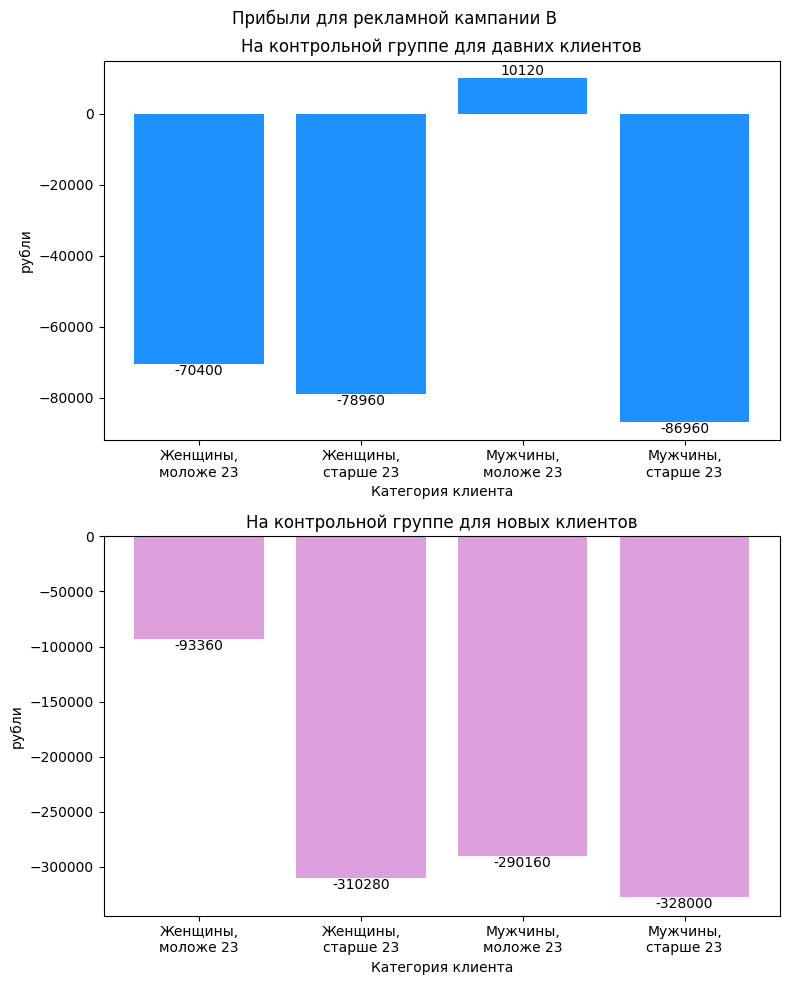

In [162]:
import matplotlib.pyplot as plt

# Данные для графиков
labels = [
    'Женщины,\nмоложе 23', 'Женщины,\nстарше 23', 'Мужчины,\nмоложе 23', 'Мужчины,\nстарше 23'
]
profits = [
    profit_2023_less23_f, profit_2023_big23_f,
    profit_2023_less23_m, profit_2023_big23_m,
    profit_2024_less23_f, profit_2024_big23_f,
    profit_2024_less23_m, profit_2024_big23_m,
]

# Разделение данных на две группы
D_labels = labels
D_profits = profits[:4]  # Соответствующие прибыли

N_labels = labels
N_profits = profits[4:]  # Соответствующие прибыли

# Создание фигуры и подграфиков
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
fig.suptitle('Прибыли для рекламной кампании B')
# График для D_<...>
plot_a = ax1.bar(D_labels, D_profits, color='dodgerblue')
ax1.set_xlabel('Категория клиента')
ax1.set_ylabel('рубли')
ax1.set_title('На контрольной группе для давних клиентов')
ax1.tick_params(axis='x')
ax1.bar_label(plot_a, label_type='edge')

# График для Н_<...>
plot_b = ax2.bar(N_labels, N_profits, color='plum')
ax2.set_xlabel('Категория клиента')
ax2.set_ylabel('рубли')
ax2.set_title('На контрольной группе для новых клиентов')
ax2.tick_params(axis='x')
ax2.bar_label(plot_b, label_type='edge')

# Настройка расположения графиков
plt.tight_layout()

# Сохранение и отображение графиков
plt.savefig('3_1')
plt.show()